# Some Important Points

- contains total 8 layers with 5 convs and 3 dense
- input images size = 256 x 256
- softmax activation function after last layer
- Response Normalization layers apply after only to 1st and 2nd Convs layer
- follow MaxPolling layer after Response Normalization layers and also after the 5th Conv layer
- apply ReLU after every MaxPooling layer and fully connected layer


# CNN layers

- 1st layer -> input_dim = 224 x 224 x 3, output_dim = 11 x 11 x 3, kernels = 96, stride = 4
- 2nd layer -> input_dim = 11 x 11 x 3, output_dim = 5 x 5 x 48, kernels = 256, stride = 1
- 3rd layer -> input_dim = 5 x 5 x 48, output_dim = 3 x 3 x 256, kernels = 348, stride = 1
- 4th layer -> input_dim = 3 x 3 x 256, output_dim = 3 x 3 x 192, kenel_size = 348, stride = 1
- 5th layer -> input_dim = 3 x 3 x 192, output_dim = 3 x 3 x 192, kernels = 256, stride = 1

In [4]:
# importing Modules for the model
import torch
import torchvision
from torch import nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Setting up Device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
device

# refer to 35,36,47 cell in fashionMNIST

device(type='cuda')

In [6]:
# Setting up transforms from data
train_transform = transforms.Compose([
    transforms.Resize(size=(227, 227)),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize(size=(227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

## Explaination
1. `transforms.Resize(size=(227, 227))`: Resizes the image to 227x227 pixels.

2. `transforms.RandomHorizontalFlip(p=0.7)`: Randomly flips the image horizontally with a probability of 70%.

3. `transforms.ToTensor()`: Converts the image to a PyTorch tensor, scaling pixel values to the range [0, 1].

4. `transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])`: Normalizes the tensor image with the given mean and standard deviation. This operation standardizes the image data to have a mean of 0 and a standard deviation of 1 across each channel.

In [7]:
# Downloading the data and creating the dataset.
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=train_transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=test_transform, download=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 44467024.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
import os

# Hyperparameters
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
LR = 1e-4
EPOCHS = 50

# Creating the dataloader from the dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [9]:
class_names = train_dataset.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [11]:
image, label = train_dataset[0]
image, label

(tensor([[[ 0.1608,  0.1608,  0.1608,  ..., -0.5373, -0.5373, -0.5373],
          [ 0.1608,  0.1608,  0.1608,  ..., -0.5373, -0.5373, -0.5373],
          [ 0.1608,  0.1608,  0.1608,  ..., -0.5373, -0.5373, -0.5373],
          ...,
          [-0.0353, -0.0353, -0.0353,  ...,  0.3882,  0.3882,  0.3882],
          [-0.0353, -0.0353, -0.0353,  ...,  0.3882,  0.3882,  0.3882],
          [-0.0353, -0.0353, -0.0353,  ...,  0.3882,  0.3882,  0.3882]],
 
         [[-0.0275, -0.0275, -0.0275,  ..., -0.5137, -0.5137, -0.5137],
          [-0.0275, -0.0275, -0.0275,  ..., -0.5137, -0.5137, -0.5137],
          [-0.0275, -0.0275, -0.0275,  ..., -0.5137, -0.5137, -0.5137],
          ...,
          [-0.2784, -0.2784, -0.2784,  ...,  0.1294,  0.1294,  0.1294],
          [-0.2784, -0.2784, -0.2784,  ...,  0.1294,  0.1294,  0.1294],
          [-0.2784, -0.2784, -0.2784,  ...,  0.1294,  0.1294,  0.1294]],
 
         [[-0.1922, -0.1922, -0.1922,  ..., -0.5059, -0.5059, -0.5059],
          [-0.1922, -0.1922,

In [12]:
class_to_idx = train_dataset.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [13]:
image.shape

torch.Size([3, 227, 227])

In [14]:
img, label = next(iter(train_loader))
img.shape, label.shape, img.dtype, label.dtype

(torch.Size([32, 3, 227, 227]), torch.Size([32]), torch.float32, torch.int64)

Image Shape : torch.Size([3, 227, 227])


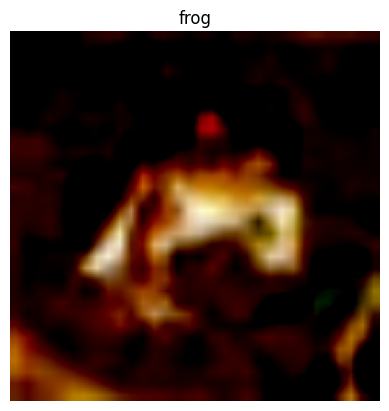

In [15]:
# visualizing the data
image, label = train_dataset[0]
print(f"Image Shape : {image.shape}")

# Transpose the image tensor to (height, width, channels) format
image = image.permute(1, 2, 0)

# Plot the image
plt.imshow(image)
plt.title(class_names[label])
plt.axis('off')
plt.show()


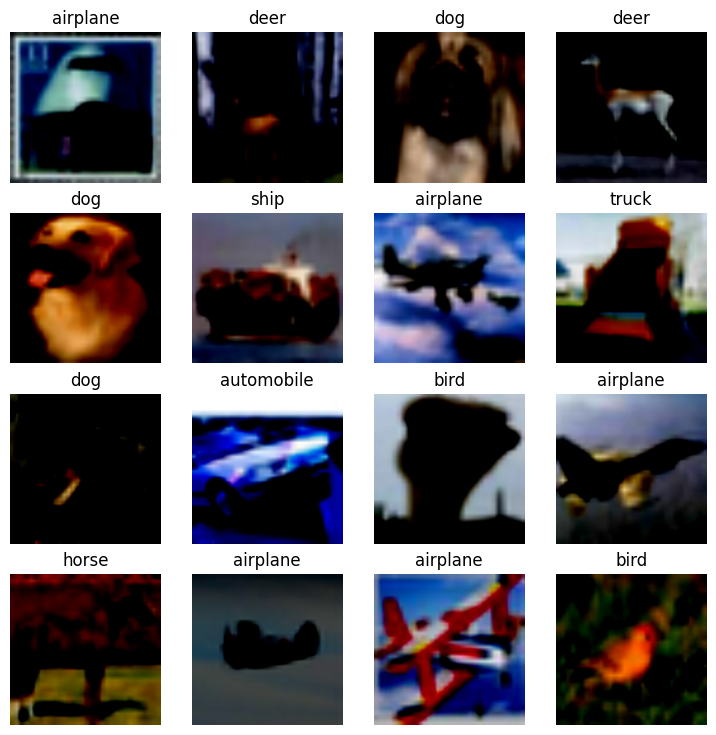

In [16]:
torch.manual_seed(42)

# Create a figure
fig = plt.figure(figsize=(9, 9))

# Number of rows and columns for the grid of images
rows, cols = 4, 4

# Loop to plot images
for i in range(1, rows * cols + 1):
    # Generate a random index
    random_idx = torch.randint(1, len(train_dataset), size=[1]).item()

    # Get the image and label from the dataset
    img, label = train_dataset[random_idx]

    # Transpose the image to the correct shape for displaying
    img = img.permute(1, 2, 0)

    # Add a subplot for the image
    fig.add_subplot(rows, cols, i)

    # Display the image
    plt.imshow(img)

    # Set the title to the class name
    plt.title(class_names[label])

    # Turn off the axis
    plt.axis(False)

# Display the entire grid of images
plt.show()

In [17]:
# Creating the model
class AlexNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_blocks = nn.Sequential(
        nn.Conv2d(in_channels = 3, out_channels=96, kernel_size=11, stride=4, padding=1), # N x 96 x 55 x 55
        nn.LocalResponseNorm(size=5),
        nn.MaxPool2d(kernel_size=3, stride=2), # N x 96 x 27 x 27
        nn.ReLU(),

        nn.Conv2d(in_channels = 96, out_channels = 256, kernel_size = 5), # N x 96 x 55 x 55
        nn.LocalResponseNorm(size=5),
        nn.MaxPool2d(kernel_size=3, stride=2),  # N x 256 x 11 x 11
        nn.ReLU(),

        nn.Conv2d(in_channels=256, out_channels=348, kernel_size=3),  # N x 348 x 9 x 9
        nn.ReLU(),

        nn.Conv2d(in_channels=348, out_channels=348, kernel_size=3), # N x 348 x 7 x 7
        nn.ReLU(),

        nn.Conv2d(in_channels=348, out_channels=256, kernel_size=3),  # N x 348 x 5 x 5
        nn.MaxPool2d(kernel_size=3, stride=2), # N x 256 x 2 x 2
        nn.ReLU()
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=1024, out_features=4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(in_features=4096, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=10),
    )

  def forward(self, x):
    return self.classifier(self.conv_blocks(x))


In [18]:
Model_1 = AlexNet().to(device)
Model_1

AlexNet(
  (conv_blocks): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1))
    (5): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=1.0)
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
    (8): Conv2d(256, 348, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): Conv2d(348, 348, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): Conv2d(348, 256, kernel_size=(3, 3), stride=(1, 1))
    (13): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Dropout(p=0.5, inplace=False)
    (2): Linear(in_features=1024, out_features=4096, bias=True)
    (

In [19]:
# setting up a loss function and an optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = Model_1.parameters(), lr = LR)


In [20]:
# Import torchmetrics for accuracy
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [21]:
import torchmetrics
# Training Helper Function
def train_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accobj: torchmetrics.Accuracy,
               device: torch.device = None):

  model.train()

  train_loss, train_acc = 0, 0

  for batch, (img, label) in enumerate(dataloader):

    if batch%200==0:
      print(f"Looked at batch: [{batch}/{len(dataloader)}]")

    # Move data to target device
    img = img.to(device)
    label = label.to(device)

    # Forward pass
    logits = model(img)

    # Loss
    loss = loss_fn(logits, label)
    train_loss += loss

    # Accuracy
    preds = torch.softmax(logits, dim=1).argmax(dim=1)
    acc = accobj(preds.cpu(), label.cpu())
    train_acc += acc

    # Set gradients to zero
    optimizer.zero_grad()

    # Backprop on loss
    loss.backward()

    # Update parameters
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.3f} | ", end='')

  return train_loss.item(), train_acc.item()

In [22]:
# Testing Helper Function
def test_step(model: nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accobj: torchmetrics.Accuracy,
               device: torch.device = None):

  test_loss, test_acc = 0, 0

  # Put model in testing mode
  model.eval()
  with torch.inference_mode():
    for batch, (img, label) in enumerate(dataloader):

      # Move image and label to target device
      img, label = img.to(device), label.to(device)

      # Forward pass
      logits = model(img)

      # Loss
      loss = loss_fn(logits, label)
      test_loss += loss

      # Accuracy
      preds = torch.softmax(logits, dim=1).argmax(dim=1)
      acc = accobj(preds.cpu(), label.cpu())
      test_acc += acc

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.3f}")

  return test_loss.item(), test_acc.item()

In [23]:
# importing helper functions file for some functions
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")  # paste the raw file link
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [24]:
### Training and Testing
from tqdm.auto import tqdm

def learn(model: nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int,
          accobj: torchmetrics.Accuracy,
          device: torch.device = None):

  train_loss, train_acc = [], []
  test_loss, test_acc = [], []

  for epoch in tqdm(range(epochs)):

    print(f"Epoch: [{epoch+1}/{epochs}]\n-----------")

    loss, acc = train_step(model, train_dataloader, loss_fn, optimizer, accobj, device)
    train_loss.append(loss)
    train_acc.append(acc)

    loss, acc = test_step(model, test_dataloader, loss_fn, accobj, device)
    test_loss.append(loss)
    test_acc.append(acc)

  return train_loss, train_acc, test_loss, test_acc

In [25]:
accobj = Accuracy(task='multiclass', num_classes=10)

trainloss, trainacc, testloss, testacc = learn(Model_1, train_loader, test_loader, loss_fn, optimizer, EPOCHS, accobj, device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: [1/50]
-----------
Looked at batch: [0/1563]
Looked at batch: [200/1563]
Looked at batch: [400/1563]
Looked at batch: [600/1563]
Looked at batch: [800/1563]
Looked at batch: [1000/1563]
Looked at batch: [1200/1563]
Looked at batch: [1400/1563]
Train Loss: 1.62301 | Train Acc: 0.393 | Test Loss: 1.24099 | Test Acc: 0.544
Epoch: [2/50]
-----------
Looked at batch: [0/1563]
Looked at batch: [200/1563]
Looked at batch: [400/1563]
Looked at batch: [600/1563]
Looked at batch: [800/1563]
Looked at batch: [1000/1563]
Looked at batch: [1200/1563]
Looked at batch: [1400/1563]
Train Loss: 1.16113 | Train Acc: 0.586 | Test Loss: 1.06162 | Test Acc: 0.629
Epoch: [3/50]
-----------
Looked at batch: [0/1563]
Looked at batch: [200/1563]
Looked at batch: [400/1563]
Looked at batch: [600/1563]
Looked at batch: [800/1563]
Looked at batch: [1000/1563]
Looked at batch: [1200/1563]
Looked at batch: [1400/1563]
Train Loss: 0.95310 | Train Acc: 0.666 | Test Loss: 0.90430 | Test Acc: 0.687
Epoch: [4/50]

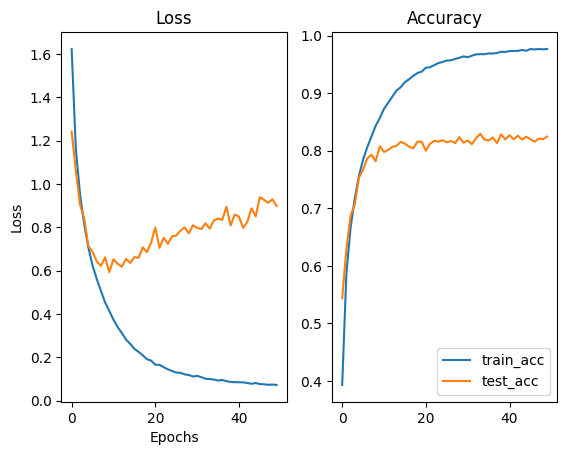

In [26]:
n_epochs = range(EPOCHS)

plt.subplot(1,2,1)
plt.plot(n_epochs, trainloss, label='train_loss')
plt.plot(n_epochs, testloss, label='test_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.subplot(1,2,2)
plt.plot(n_epochs, trainacc, label='train_acc')
plt.plot(n_epochs, testacc, label='test_acc')
plt.title('Accuracy')
plt.legend()